In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
X_train = pd.read_csv(r'../datasets/htrain.csv')
X_val = pd.read_csv(r'../datasets/hval.csv')
X_test = pd.read_csv(r'../datasets/htest.csv')
y_train = pd.read_csv(r'../datasets/hy_train.csv')
y_val = pd.read_csv(r'../datasets/hy_val.csv')
y_test = pd.read_csv(r'../datasets/hy_test.csv')

## Tensorflow Models

1. sequential (3L-relu) with Adam(.001) [64-32-1]


Epoch 1/45


d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - loss: 0.7328 - mae: 0.8307 - val_loss: 0.4985 - val_mae: 0.6955
Epoch 2/45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.5194 - mae: 0.6934 - val_loss: 0.3499 - val_mae: 0.5768
Epoch 3/45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3544 - mae: 0.5762 - val_loss: 0.2422 - val_mae: 0.4714
Epoch 4/45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2370 - mae: 0.4696 - val_loss: 0.1649 - val_mae: 0.3764
Epoch 5/45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1559 - mae: 0.3760 - val_loss: 0.1065 - val_mae: 0.2837
Epoch 6/45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1003 - mae: 0.2868 - val_loss: 0.0660 - val_mae: 0.1929
Epoch 7/45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0713 - mae: 0.2238 - val_loss: 0.0439 - val_mae: 0.1520
Epoch 8/45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0565 - mae: 0.1804 - val_loss: 0.0373 - val_mae: 0.1513
Epoch 9/45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0591 - mae: 0.1719 - val_loss: 

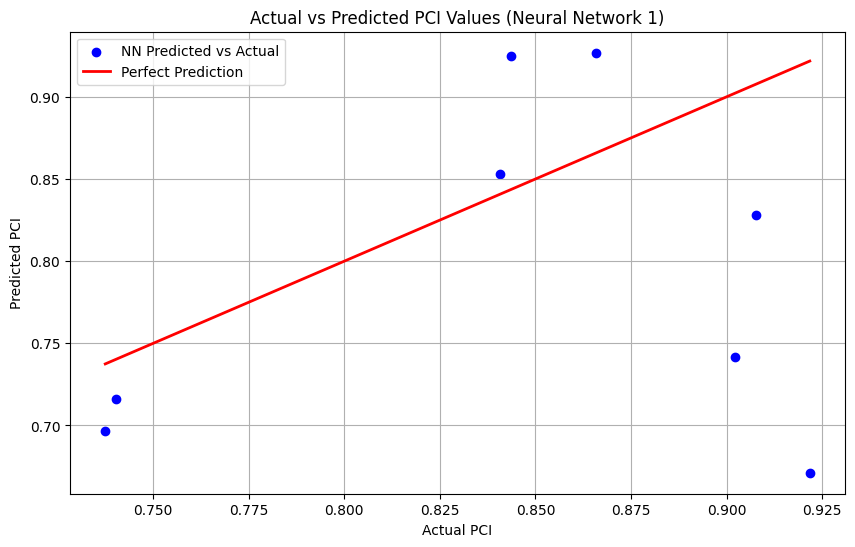

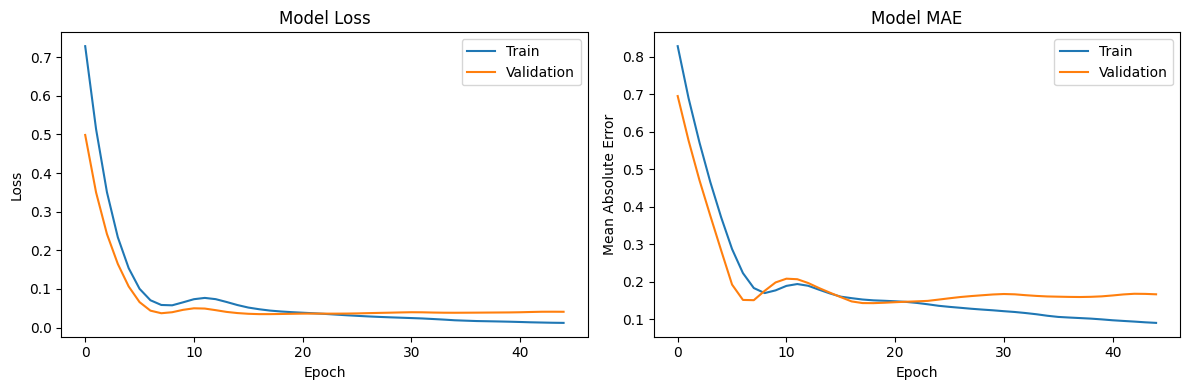

CPU times: total: 1.67 s
Wall time: 5.52 s


In [13]:
%%time
model1 = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Use 'linear' for regression tasks
])
model1.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
history = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=45, batch_size=32)
test_loss1, test_mae1 = model1.evaluate(X_test, y_test)
y_pred_nn = model1.predict(X_test)
print(f'Test MAE: {test_mae1}, Test Loss: {test_loss1})')
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print(f'NN - MSE: {mse_nn}, R^2: {r2_nn}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='blue', label='NN Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (Neural Network 1)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [14]:
model1.save(r'../models/trialmodels/model1.keras')

2. Sequential (3L-relu) with dropout(0.2) Adam(0.001) [64-32-16]

Epoch 1/50


d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - loss: 0.7697 - val_loss: 0.5854
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.5803 - val_loss: 0.4540
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.5419 - val_loss: 0.3526
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5433 - val_loss: 0.2774
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3061 - val_loss: 0.2172
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2346 - val_loss: 0.1700
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2184 - val_loss: 0.1373
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2478 - val_loss: 0.1153
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1553 - val_loss: 0.0971
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1780 - val_loss: 0.0826
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1724 - val_loss: 0.0719
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0744 - val_loss: 0.0646
Epoch 13/50

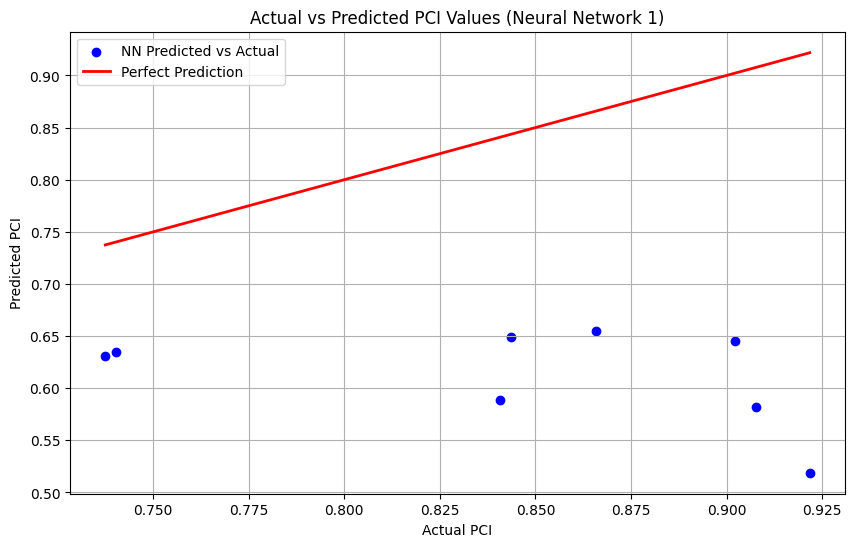

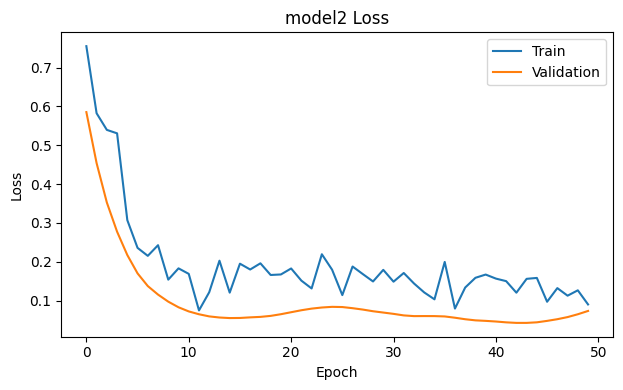

CPU times: total: 1.75 s
Wall time: 6.02 s


In [19]:
%%time
model2 = Sequential()

# Input layer and first hidden layer
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dropout(0.2))

# Second hidden layer
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))

# Third hidden layer (optional)
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.2))

# Output layer
model2.add(Dense(1, activation='linear'))

# Compile the model2
model2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# model2.summary()

# Train the model2
history = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Evaluate the model2
test_loss= model2.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
y_pred_nn2 = model2.predict(X_test)
mse_nn2 = mean_squared_error(y_test, y_pred_nn2)
r2_nn2 = r2_score(y_test, y_pred_nn2)
print(f'NN2 - MSE: {mse_nn2}, R^2: {r2_nn2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn2, color='blue', label='NN Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (Neural Network 1)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()



In [20]:
model2.save(r'../models/trialmodels/model2.keras')

3. Sequential (3L-relu) with droupout(0.3) with earlystopping(pat=10) with Adam(!)[128,64,32]

Epoch 1/70


d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - loss: 0.6885 - val_loss: 0.4654
Epoch 2/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.5509 - val_loss: 0.2987
Epoch 3/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3973 - val_loss: 0.2078
Epoch 4/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2707 - val_loss: 0.1800
Epoch 5/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2091 - val_loss: 0.2094
Epoch 6/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2292 - val_loss: 0.2570
Epoch 7/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2665 - val_loss: 0.2723
Epoch 8/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2377 - val_loss: 0.2544
Epoch 9/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2468 - val_loss: 0.2197
Epoch 10/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2126 - val_loss: 0.1896
Epoch 11/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2047 - val_loss: 0.1730
Epoch 12/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2121 - val_loss: 0.1689
Epoch 13/70

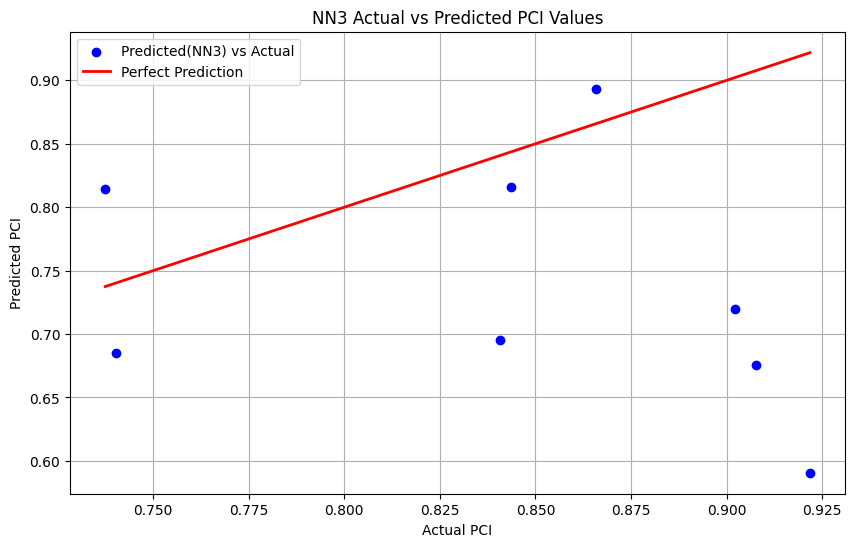

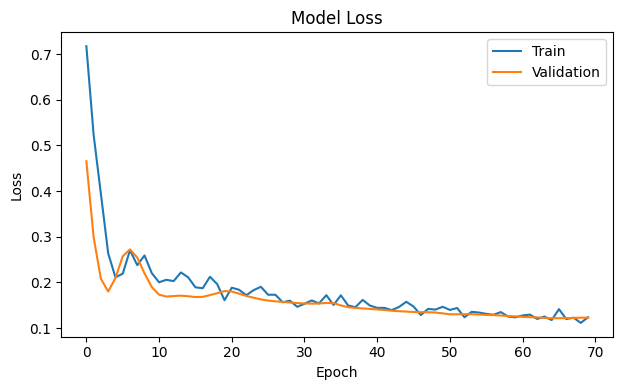

In [23]:
%%time
model3 = Sequential([
    Dense(units=128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),  # Dropout layer to prevent overfitting
    Dense(units=64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),  # Another Dropout layer
    Dense(units=32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(units=1, activation='linear')
])

# Compile the model3
model3.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model3 with early stopping
history = model3.fit(X_train, y_train, epochs=70, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Predict on the test set
y_pred_nn3 = model3.predict(X_test)

# Evaluate the model3
mse_nn3 = mean_squared_error(y_test, y_pred_nn3)
r2_nn3 = r2_score(y_test, y_pred_nn3)
print(f'Mean Squared Error on Test Data: {mse_nn3}')
print(f'R^2 Score on Test Data: {r2_nn3}')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn3, color='blue', label='Predicted(NN3) vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('NN3 Actual vs Predicted PCI Values')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')


plt.tight_layout()
plt.show()

In [24]:
model3.save(r'../models/trialmodels/model3.keras')

4. Sequential (4L-relu) with droupout(~0.4-0.2) with earlystopping(pat=15) with Adam(.001)[128,64,32,1]

Epoch 1/200


d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 1.3648 - val_loss: 0.5903
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.5579 - val_loss: 0.5876
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 1.4470 - val_loss: 0.5884
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 1.4090 - val_loss: 0.5878
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.0760 - val_loss: 0.5876
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1.8047 - val_loss: 0.5804
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 1.4399 - val_loss: 0.5676
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1.4212 - val_loss: 0.5562
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.9394 - val_loss: 0.5448
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 1.0738 - val_loss: 0.5334
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1.4509 - val_loss: 0.5190
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.9972 - val_loss: 0.5075
Epo

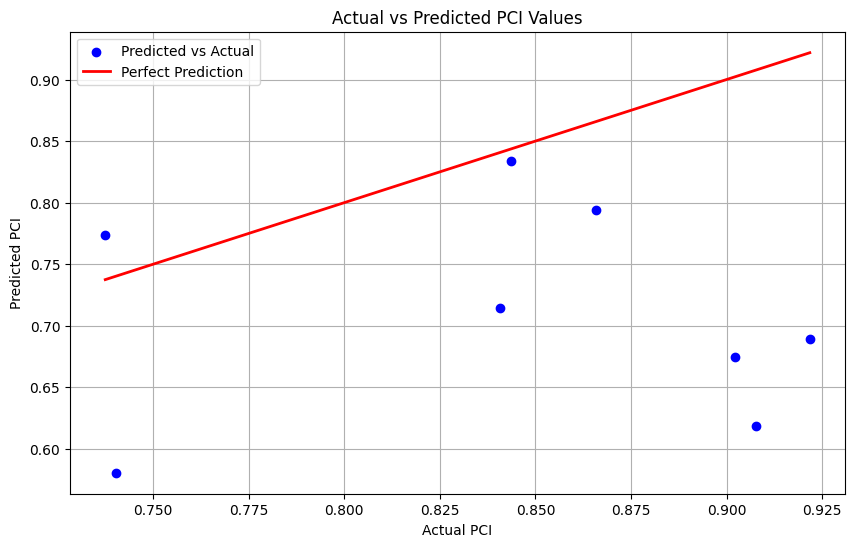

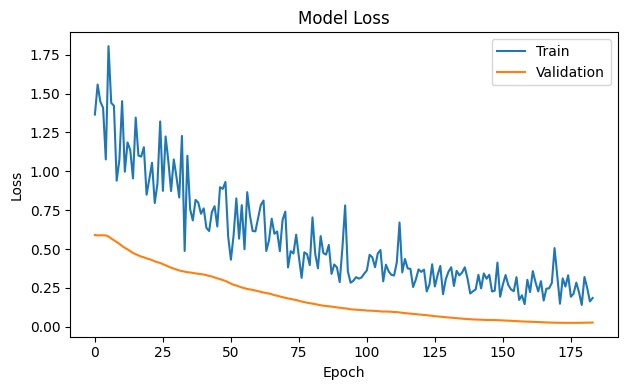

CPU times: total: 4.7 s
Wall time: 18.4 s


In [31]:
%%time
model4 = Sequential()

# Input layer with batch normalization
model4.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model4.add(BatchNormalization())

# Hidden layers with Dropout and Batch Normalization
model4.add(Dense(units=128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.4))

model4.add(Dense(units=64, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))

model4.add(Dense(units=32, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

# Output layer
model4.add(Dense(units=1, activation='linear'))

# Compile the model4 with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model4.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model4
history = model4.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Predict on the test set
y_pred_nn4 = model4.predict(X_test)

# Evaluate the model4
mse_nn4 = mean_squared_error(y_test, y_pred_nn4)
r2_nn4 = r2_score(y_test, y_pred_nn4)
print(f'Mean Squared Error on Test Data: {mse_nn4}')
print(f'R^2 Score on Test Data: {r2_nn4}')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn4, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')


plt.tight_layout()
plt.show()


In [32]:
model4.save(r'../models/trialmodels/model4.keras')

## Advanced Tensorflow Models

1. Deep Neural Network (DNN)

d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 3.5112 - val_loss: 0.5067
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 2.2948 - val_loss: 0.5024
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 2.4179 - val_loss: 0.4911
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 1.8614 - val_loss: 0.4859
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 1.9997 - val_loss: 0.4842
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1.7275 - val_loss: 0.4844
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 1.8612 - val_loss: 0.4845
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 1.4044 - val_loss: 0.4826
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 2.1556 - val_loss: 0.4803
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1.1012 - val_loss: 0.4792
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 2.0641 - val_loss: 0.4754
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 1.7216 - val_loss

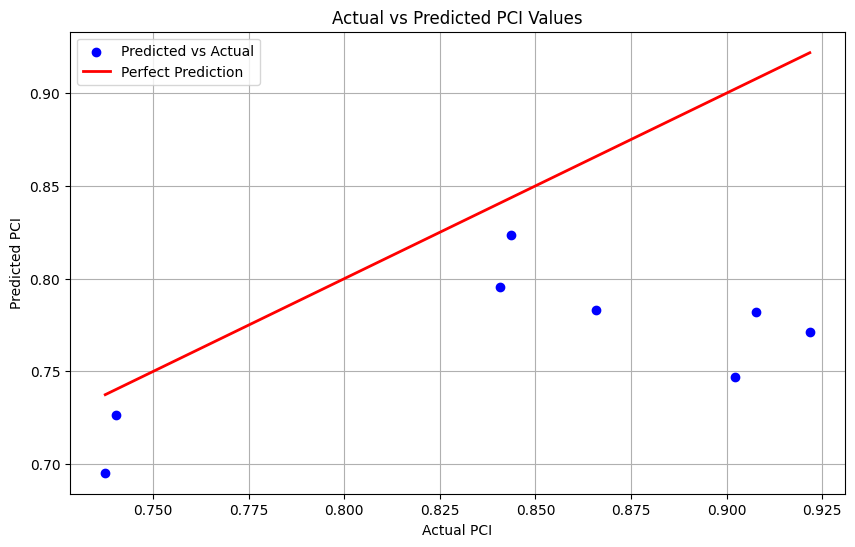

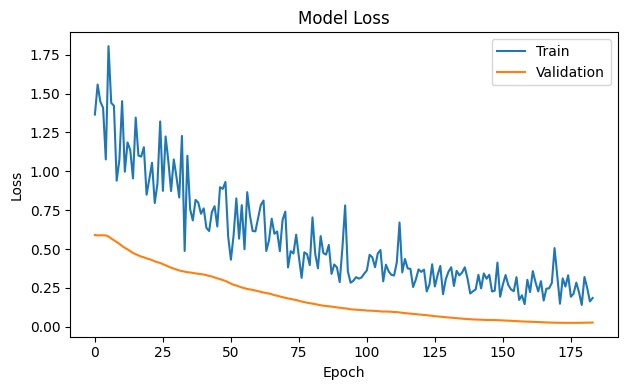

CPU times: total: 5.16 s
Wall time: 18.6 s


In [33]:
%%time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Build the DNN model
model_dnn = Sequential()

# Input layer
model_dnn.add(Dense(units=256, activation='relu', input_shape=(X_train.shape[1],)))
model_dnn.add(BatchNormalization())
model_dnn.add(Dropout(0.3))

# Hidden layers
model_dnn.add(Dense(units=128, activation='relu'))
model_dnn.add(BatchNormalization())
model_dnn.add(Dropout(0.3))

model_dnn.add(Dense(units=64, activation='relu'))
model_dnn.add(BatchNormalization())
model_dnn.add(Dropout(0.2))

model_dnn.add(Dense(units=32, activation='relu'))
model_dnn.add(BatchNormalization())

# Output layer
model_dnn.add(Dense(units=1, activation='linear'))

# Compile the model
model_dnn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history_dnn = model_dnn.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred_dnn = model_dnn.predict(X_test)

# Evaluate the model
mse_dnn = mean_squared_error(y_test, y_pred_dnn)
r2_dnn = r2_score(y_test, y_pred_dnn)
print(f'DNN - MSE: {mse_dnn}, R^2: {r2_dnn}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dnn, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')


plt.tight_layout()
plt.show()


In [34]:
model_dnn.save(r'../models/trialmodels/model_dnn.keras')

## SKLearn Models :

- sklearn model 1. Random Forest Regressor

d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest - MSE: 0.007820020930214434, R^2: -0.731741101511882


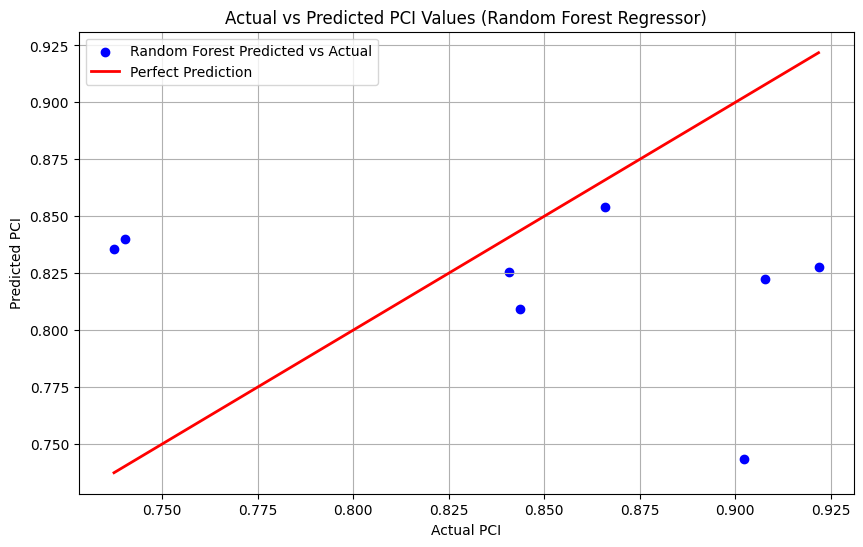

CPU times: total: 188 ms
Wall time: 459 ms


In [3]:
%%time
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - MSE: {mse_rf}, R^2: {r2_rf}')


# Plot Actual vs Predicted values for the best model (use the one with the highest R^2 score)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Random Forest Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (Random Forest Regressor)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()

- sklearn model 2. Gradient Boosting Regressor

Gradient Boosting - MSE: 0.012667846277710108, R^2: -1.8052904541450308


d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


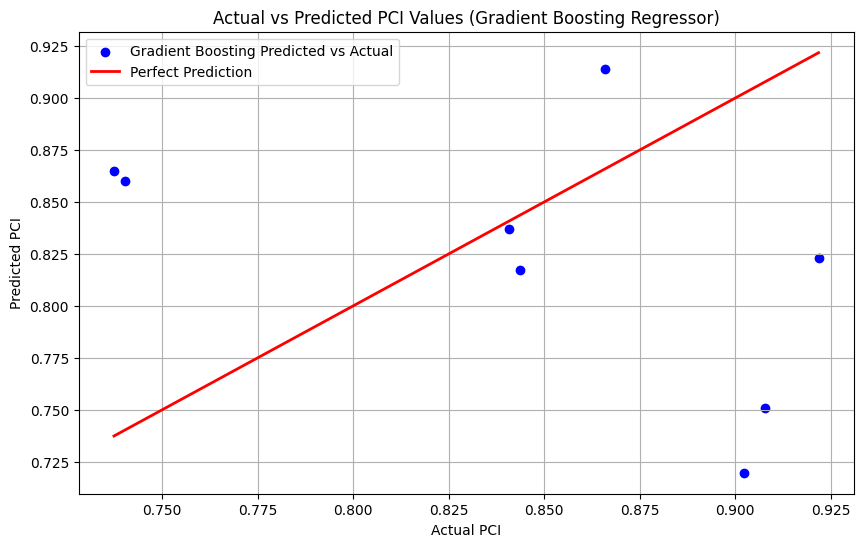

CPU times: total: 62.5 ms
Wall time: 315 ms


In [4]:
%%time
# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'Gradient Boosting - MSE: {mse_gb}, R^2: {r2_gb}')


# Plot Actual vs Predicted values for the best model (use the one with the highest R^2 score)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', label='Gradient Boosting Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (Gradient Boosting Regressor)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()

- sklearn model 3. XGBoost Regressor

XGBoost - MSE: 0.01835028831206855, R^2: -3.0636649131774902


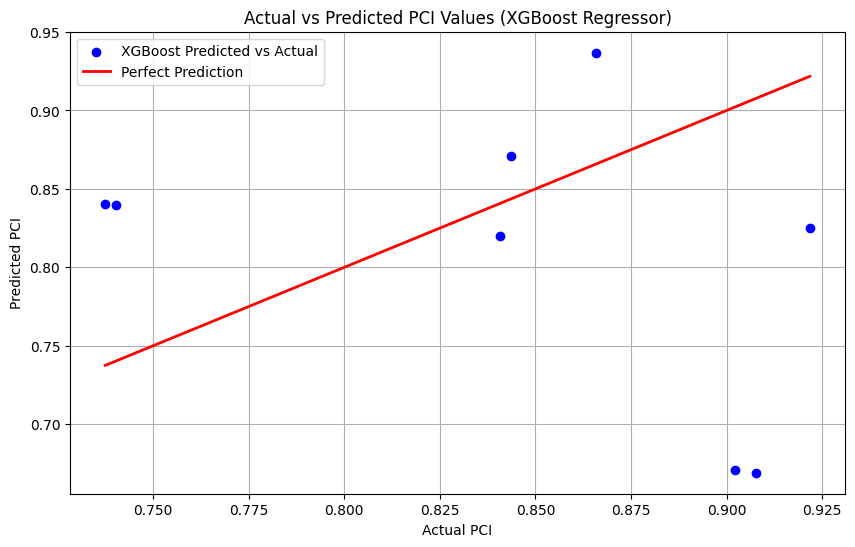

CPU times: total: 1.53 s
Wall time: 400 ms


In [5]:
%%time
# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost - MSE: {mse_xgb}, R^2: {r2_xgb}')



# Plot Actual vs Predicted values for the best model (use the one with the highest R^2 score)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', label='XGBoost Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (XGBoost Regressor)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()

- sklearn model 4. XGBoost Regressor with hyperparameter training

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best XGBoost Model - MSE: 0.010185831396787921, R^2: -1.2556490898132324


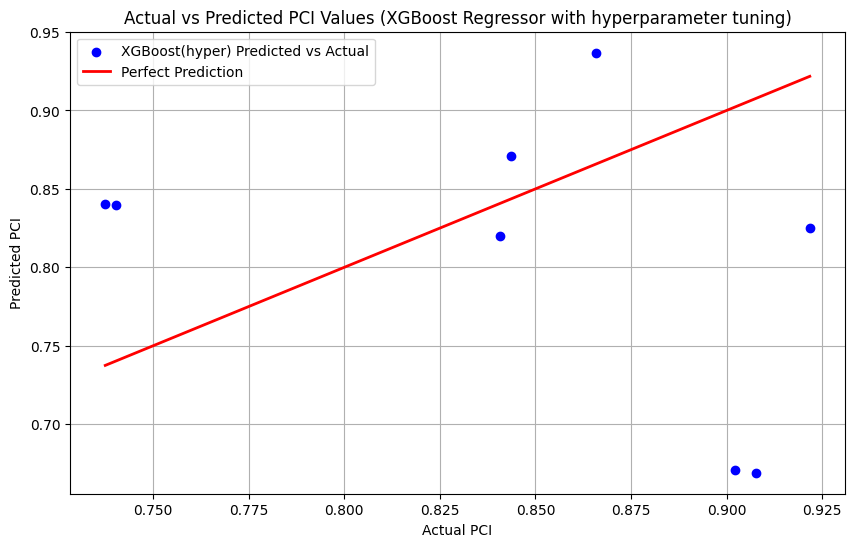

CPU times: total: 2min 54s
Wall time: 14.5 s


In [6]:
%%time
# Example: Tuning XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the best model
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)
print(f'Best XGBoost Model - MSE: {mse_best_xgb}, R^2: {r2_best_xgb}')


# Plot Actual vs Predicted values for the best model (use the one with the highest R^2 score)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', label='XGBoost(hyper) Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (XGBoost Regressor with hyperparameter tuning)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
print(f'Random Forest -     MSE: {mse_rf}, R^2: {r2_rf}')
print(f'Gradient Boosting - MSE: {mse_gb}, R^2: {r2_gb}')
print(f'XGBoost -           MSE: {mse_xgb}, R^2: {r2_xgb}')
print(f'Best XGBoost Model- MSE: {mse_best_xgb}, R^2: {r2_best_xgb}')

Random Forest -     MSE: 0.007820020930214434, R^2: -0.731741101511882
Gradient Boosting - MSE: 0.012667846277710108, R^2: -1.8052904541450308
XGBoost -           MSE: 0.01835028831206855, R^2: -3.0636649131774902
Best XGBoost Model- MSE: 0.010185831396787921, R^2: -1.2556490898132324


## More Advanced models :

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor

1. XGBoost Regressor with Hyperparameter Tuning

Fitting 5 folds for each of 50 candidates, totalling 250 fits


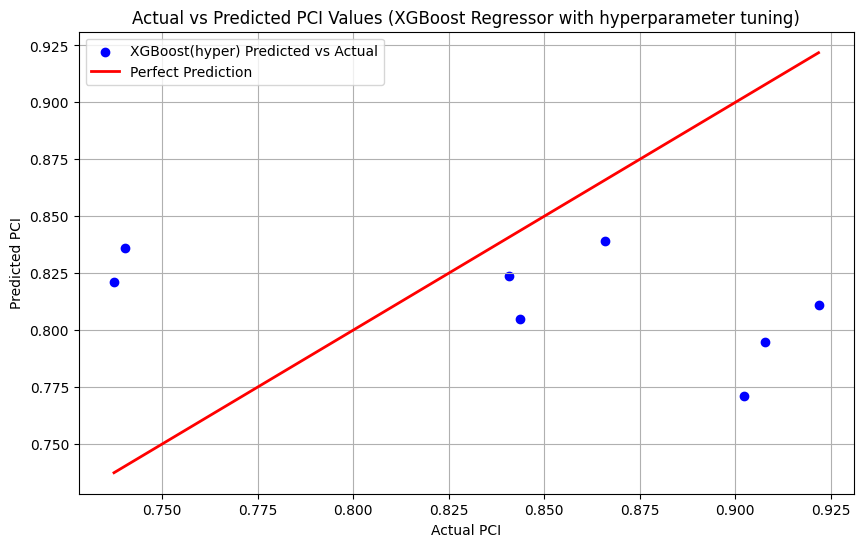

CPU times: total: 2.77 s
Wall time: 2.4 s


In [18]:
%%time 
xgb = XGBRegressor(random_state=42)
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_random_search = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid,
                                       n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)

# Best model and predictions
best_xgb = xgb_random_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', label='XGBoost(hyper) Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (XGBoost Regressor with hyperparameter tuning)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()


2. LightGBM Regressor

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 35, number of used features: 0
[LightGBM] [Info] Start training from score 0.792977
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there

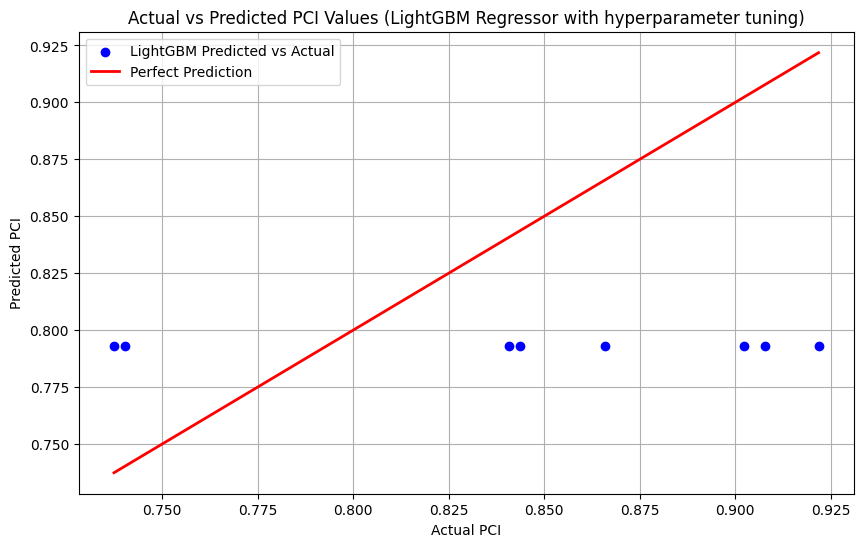

CPU times: total: 1.09 s
Wall time: 8.09 s


In [27]:
%%time
lgbm = LGBMRegressor(random_state=42)
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 31, 50],
    'subsample': [0.7, 0.8, 0.9]
}

lgbm_random_search = RandomizedSearchCV(estimator=lgbm, param_distributions=lgbm_param_grid,
                                        n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)
lgbm_random_search.fit(X_train, y_train)

# Best model and predictions
best_lgbm = lgbm_random_search.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgbm, color='blue', label='LightGBM Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (LightGBM Regressor with hyperparameter tuning)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()


3. CatBoost Regressor

d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 27 candidates, totalling 135 fits


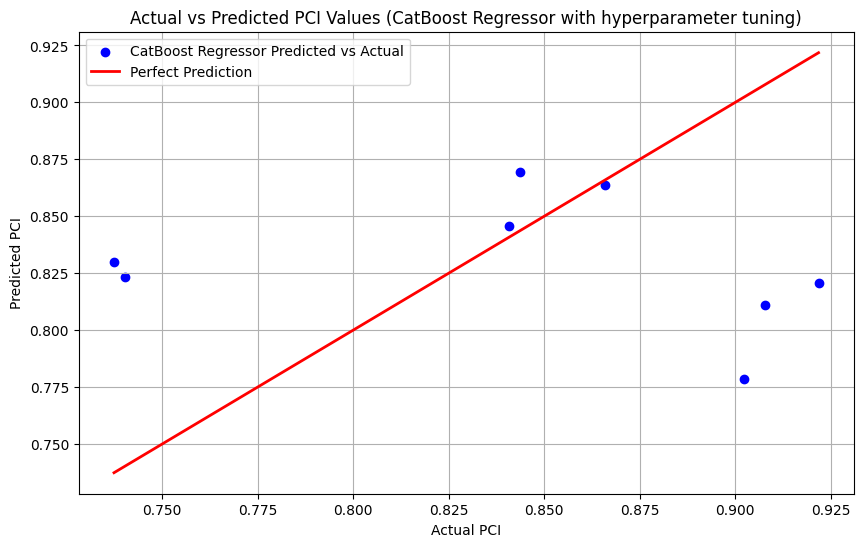

CPU times: total: 438 ms
Wall time: 2min 21s


In [28]:
%%time
catboost = CatBoostRegressor(random_seed=42, verbose=0)
catboost_param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7]
}

catboost_random_search = RandomizedSearchCV(estimator=catboost, param_distributions=catboost_param_grid,
                                            n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)
catboost_random_search.fit(X_train, y_train)

# Best model and predictions
best_catboost = catboost_random_search.best_estimator_
y_pred_catboost = best_catboost.predict(X_test)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_catboost, color='blue', label='CatBoost Regressor Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (CatBoost Regressor with hyperparameter tuning)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()

- Stacking Regressor

d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 35, number of used features: 0
[LightGBM] [Info] Start training from score 0.792977
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM

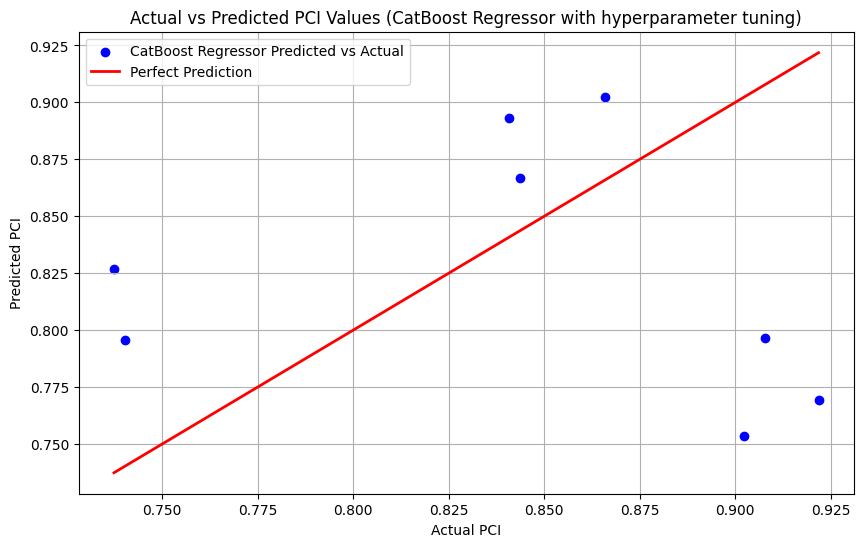

CPU times: total: 7.45 s
Wall time: 2.98 s


In [29]:
%%time
# Define base models
estimators = [
    ('xgb', best_xgb),
    ('lgbm', best_lgbm),
    ('catboost', best_catboost)
]

# Define Stacking Regressor
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=XGBRegressor())

# Train Stacking Regressor
stacking_regressor.fit(X_train, y_train)

# Predict using Stacking Regressor
y_pred_stack = stacking_regressor.predict(X_test)

# Evaluate Stacking Regressor
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)
print(f'Stacking Regressor - MSE: {mse_stack}, R^2: {r2_stack}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stack, color='blue', label='CatBoost Regressor Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (CatBoost Regressor with hyperparameter tuning)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()


- Compare models

XGBoost -  MSE: 0.007607648607558123, R^2: -0.684711217880249
LightGBM - MSE: 0.007219201025766768, R^2: -0.5986897283220234
CatBoost - MSE: 0.006379722717839883, R^2: -0.41278752900082916
Stacking - MSE: 0.009184883900849435, R^2: -1.033989667892456


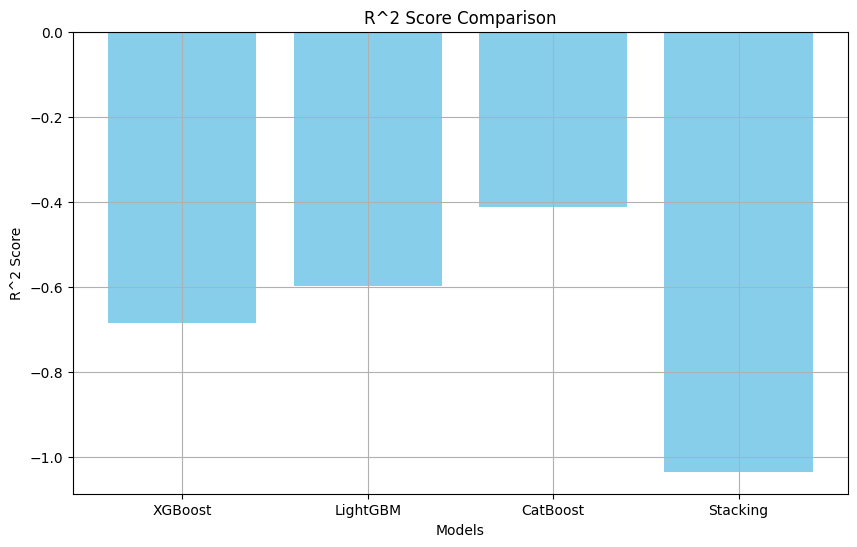

In [37]:
# XGBoost
mse_xgb2 = mean_squared_error(y_test, y_pred_xgb)
r2_xgb2 = r2_score(y_test, y_pred_xgb)
print(f'XGBoost -  MSE: {mse_xgb}, R^2: {r2_xgb}')

# LightGBM
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
print(f'LightGBM - MSE: {mse_lgbm}, R^2: {r2_lgbm}')

# CatBoost
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)
print(f'CatBoost - MSE: {mse_catboost}, R^2: {r2_catboost}')

# Stacking Regressor
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)
print(f'Stacking - MSE: {mse_stack}, R^2: {r2_stack}')


plt.figure(figsize=(10, 6))
plt.bar(['XGBoost', 'LightGBM', 'CatBoost', 'Stacking'], [r2_xgb, r2_lgbm, r2_catboost, r2_stack], color='skyblue')
plt.title('R^2 Score Comparison')
plt.xlabel('Models')
plt.ylabel('R^2 Score')
# plt.ylim(0.5, 1)
plt.grid(True)
plt.show()


## COMPARING ALL MODELS

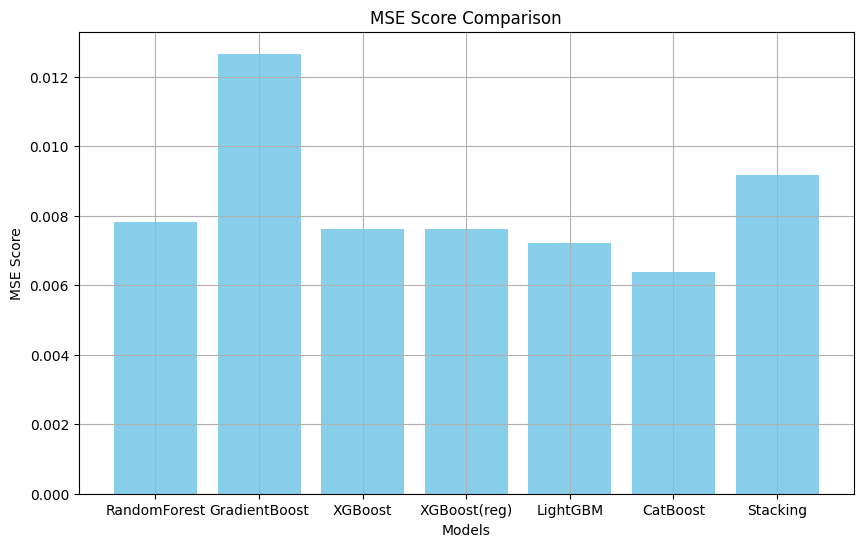

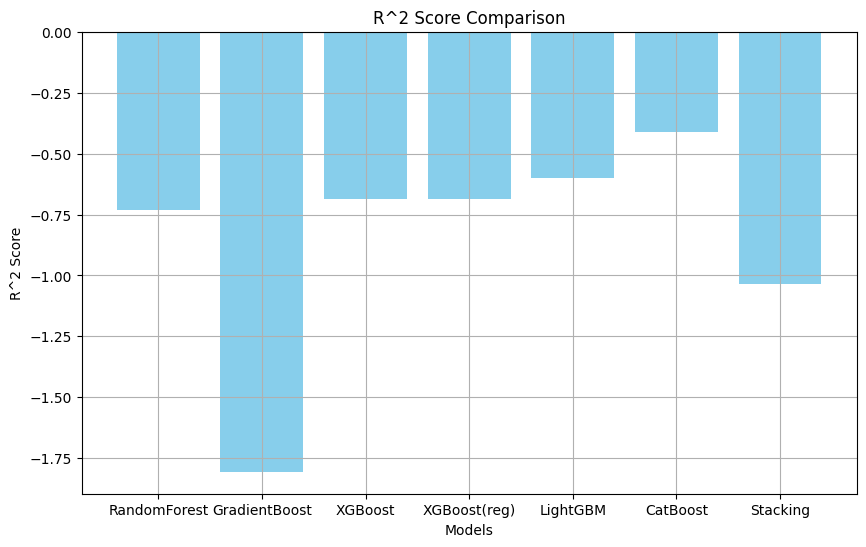

In [39]:
#plot the mse scores and r2 scores

plt.figure(figsize=(10, 6))
plt.bar(['RandomForest','GradientBoost','XGBoost','XGBoost(reg)', 'LightGBM', 'CatBoost', 'Stacking'], [mse_rf,mse_gb,mse_xgb,mse_xgb2, mse_lgbm, mse_catboost, mse_stack], color='skyblue')
plt.title('MSE Score Comparison')
plt.xlabel('Models')
plt.ylabel('MSE Score')
plt.grid(True)
plt.show()

#plot the mse r2 scores

plt.figure(figsize=(10, 6))
plt.bar(['RandomForest','GradientBoost','XGBoost','XGBoost(reg)', 'LightGBM', 'CatBoost', 'Stacking'], [r2_rf,r2_gb,r2_xgb,r2_xgb2, r2_lgbm, r2_catboost, r2_stack], color='skyblue')
plt.title('R^2 Score Comparison')
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.grid(True)
plt.show()